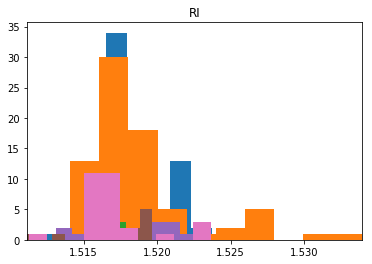

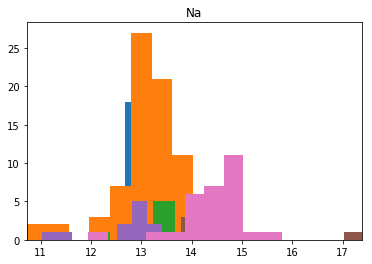

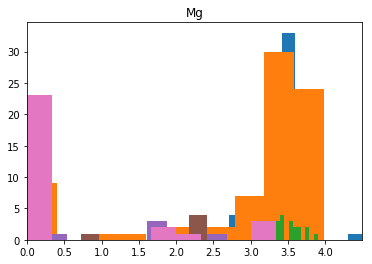

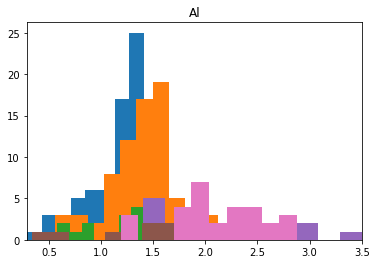

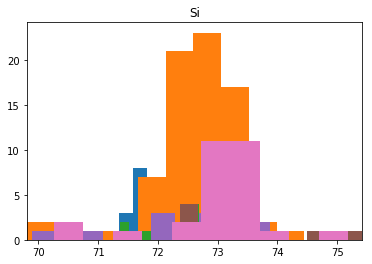

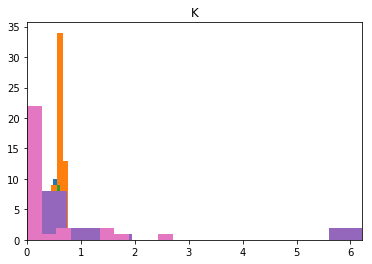

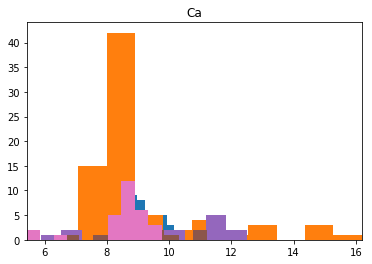

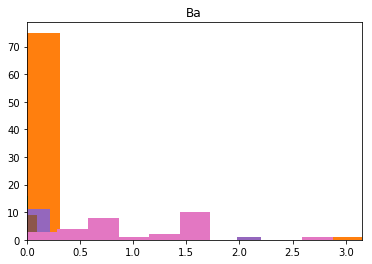

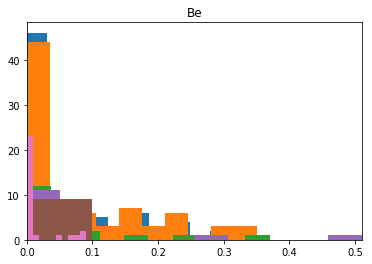

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load Glass Data into a pandas dataframe
glass_data = pd.read_csv('glass.csv')
columns=['RI','Na','Mg','Al','Si','K','Ca','Ba','Be']

#For each feature, plot a histogram for each class to show lack of separation between classes
for col in columns:
    for i in range(1,8):
        data = glass_data.loc[glass_data['Type of Glass']==i][col]
        plt.hist(data)
        x_min = min(glass_data[col])
        x_max = max(glass_data[col])
    plt.xlim((x_min,x_max))
    plt.title(col)
    plt.show()


LDA Accuracy: 83.721
GNB Results w/out LDA: 48.837
GNB Results w/LDA: 58.14
GNB Results w/PCA: 53.488
KNN Results: 86.047
Dummy Results: 27.907
Decision Tree Results: 76.744


Text(0.5, 1.0, 'Classifier Accuracies')

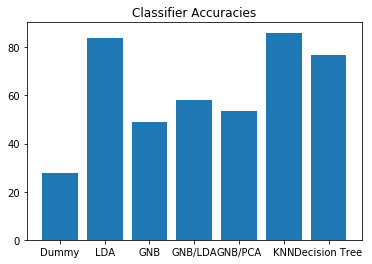

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier


y = glass_data['Type of Glass']
glass_data_features = glass_data.drop('Type of Glass', axis = 1)

#Setup classifiers
lda = LDA(n_components =2)
KNN = KNeighborsClassifier(n_neighbors=1)
gnb = GaussianNB()
dummy = DummyClassifier()
dtree = DecisionTreeClassifier()
pca = PCA()

#Split data into training and testing
train_X, test_X, train_y, test_y = train_test_split(glass_data_features, y, random_state=4, test_size=0.2)

#Dummy Fitting/Scoring
dummy.fit(train_X, train_y)
dummy_score = dummy.score(test_X, test_y)

#LDA Fitting/Scoring
lda.fit(train_X, train_y)
lda_score = lda.score(test_X, test_y)

#PCA Fitting/Scoring
train_X_pca = pca.fit_transform(train_X)
test_X_pca = pca.transform(test_X)
gnb.fit(train_X_pca, train_y)
gnb_pca_score = gnb.score(test_X_pca, test_y)

#Gaussian Naive Bayes w/out LDA Fitting/Scoring
gnb.fit(train_X, train_y)
gnb_score = gnb.score(test_X, test_y)

#Gaussian Naive Bayes w/LDA Fitting/Scoring
train_X_lda = lda.transform(train_X)
gnb.fit(train_X_lda, train_y)
test_X_lda = lda.transform(test_X)
gnb_lda_score = gnb.score(test_X_lda, test_y)

#KNN Fitting/Scoring
KNN.fit(train_X, train_y)
knn_score = KNN.score(test_X, test_y)

#DecisionTree Fitting/Scoring
dtree.fit(train_X,train_y)
dtree_score = dtree.score(test_X, test_y)

print("LDA Accuracy: " + str(round(lda_score*100,3)))
print("GNB Results w/out LDA: " + str(round(gnb_score*100,3)))
print("GNB Results w/LDA: " + str(round(gnb_lda_score*100,3)))
print("GNB Results w/PCA: " + str(round(gnb_pca_score*100,3)))
print("KNN Results: " + str(round(knn_score*100,3)))
print("Dummy Results: " + str(round(dummy_score*100,3)))
print("Decision Tree Results: " + str(round(dtree_score*100,3)))

classifiers = ['Dummy','LDA','GNB','GNB/LDA','GNB/PCA','KNN','Decision Tree']
scores = [dummy_score, lda_score, gnb_score, gnb_lda_score, gnb_pca_score, knn_score, dtree_score]
scores = [i*100 for i in scores]
plt.bar(x = classifiers, height=scores)
plt.title('Classifier Accuracies')

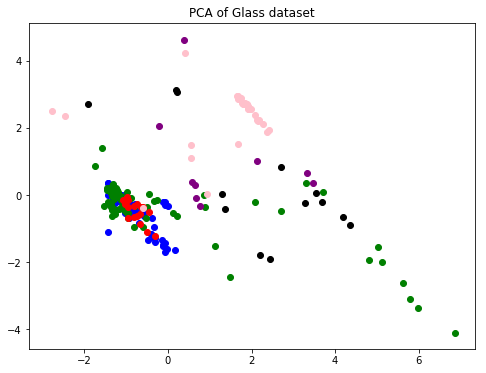

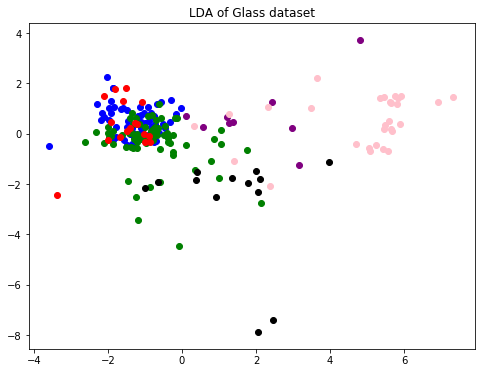

In [13]:
#Fit and transform complete dataset using PCA
pca_result = pca.fit(glass_data_features).transform(glass_data_features)

#Fit and transform complete dataset using LDA
lda_result = lda.fit(glass_data_features, y).transform(glass_data_features)

plt.figure(figsize=(8,6))
colors = ['blue', 'green', 'red', 'yellow', 'black', 'purple', 'pink']

#Plot PCA transformed Data to show separation of classes amongst new dimensions
for color, i in zip(colors, [1, 2, 3, 4, 5, 6, 7]):
    plt.scatter(pca_result[y == i, 0], pca_result[y == i, 1], color=color)
plt.title('PCA of Glass dataset')

#Plot LDA transformed Data to show separation of classes amongst new dimensions
plt.figure(figsize=(8,6))
for color, i in zip(colors, [1, 2, 3, 4, 5, 6, 7]):
    plt.scatter(lda_result[y == i, 0], lda_result[y == i, 1], color=color)
plt.title('LDA of Glass dataset')

plt.show()